# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

ModuleNotFoundError: No module named 'matplotlib'

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}") 


Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=83211cff9a433638d781c4b9442ee040"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        print(city_weather)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
{'coord': {'lon': -130.1015, 'lat': -25.066}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 22.41, 'feels_like': 22.35, 'temp_min': 22.41, 'temp_max': 22.41, 'pressure': 1023, 'humidity': 63, 'sea_level': 1023, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 8.09, 'deg': 131, 'gust': 8.6}, 'rain': {'1h': 0.12}, 'clouds': {'all': 100}, 'dt': 1683871865, 'sys': {'country': 'PN', 'sunrise': 1683817660, 'sunset': 1683857158}, 'timezone': -28800, 'id': 4030723, 'name': 'Adamstown', 'cod': 200}
Processing Record 2 of Set 1 | hamilton
{'coord': {'lon': -84.5333, 'lat': 39.1834}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 18.29, 'feels_like': 18.5, 'temp_min': 15.05, 'temp_max': 20.55, 'pressure': 1016, 'humidity': 89}, 'visibil

{'coord': {'lon': 166.4372, 'lat': 68.0546}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 1.13, 'feels_like': 1.13, 'temp_min': 1.13, 'temp_max': 1.13, 'pressure': 1011, 'humidity': 99, 'sea_level': 1011, 'grnd_level': 975}, 'visibility': 61, 'wind': {'speed': 1.3, 'deg': 224, 'gust': 1.25}, 'snow': {'1h': 0.16}, 'clouds': {'all': 100}, 'dt': 1683872041, 'sys': {'country': 'RU', 'sunrise': 1683817216, 'sunset': 1683888063}, 'timezone': 43200, 'id': 2126682, 'name': 'Bilibino', 'cod': 200}
Processing Record 16 of Set 1 | udachny
{'coord': {'lon': 112.4, 'lat': 66.4167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 6.36, 'feels_like': 2.13, 'temp_min': 6.36, 'temp_max': 6.36, 'pressure': 1005, 'humidity': 41, 'sea_level': 1005, 'grnd_level': 970}, 'visibility': 10000, 'wind': {'speed': 7.39, 'deg': 208, 'gust': 9.71}, 'clouds':

{'coord': {'lon': 123.515, 'lat': 9.2142}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.58, 'feels_like': 34.71, 'temp_min': 29.58, 'temp_max': 29.58, 'pressure': 1010, 'humidity': 73, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.5, 'deg': 46, 'gust': 3.46}, 'clouds': {'all': 100}, 'dt': 1683872045, 'sys': {'country': 'PH', 'sunrise': 1683840405, 'sunset': 1683885478}, 'timezone': 28800, 'id': 1686066, 'name': 'Siquijor', 'cod': 200}
Processing Record 32 of Set 1 | idri
{'coord': {'lon': 13.2667, 'lat': 27.5}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.19, 'feels_like': 20.51, 'temp_min': 21.19, 'temp_max': 21.19, 'pressure': 1018, 'humidity': 44, 'sea_level': 1018, 'grnd_level': 976}, 'visibility': 10000, 'wind': {'speed': 6.4, 'deg': 102, 'gust': 10.49}, 'clouds': {'all': 64}

{'coord': {'lon': 15.1594, 'lat': -26.6481}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 14.37, 'feels_like': 13.82, 'temp_min': 14.37, 'temp_max': 14.37, 'pressure': 1017, 'humidity': 75, 'sea_level': 1017, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 12.01, 'deg': 158, 'gust': 17.31}, 'clouds': {'all': 97}, 'dt': 1683872048, 'sys': {'country': 'NA', 'sunrise': 1683869367, 'sunset': 1683908525}, 'timezone': 7200, 'id': 3355672, 'name': 'Lüderitz', 'cod': 200}
Processing Record 46 of Set 1 | nagqu
{'coord': {'lon': 92, 'lat': 31.5}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 2.08, 'feels_like': -1.73, 'temp_min': 2.08, 'temp_max': 2.08, 'pressure': 1018, 'humidity': 24, 'sea_level': 1018, 'grnd_level': 592}, 'visibility': 10000, 'wind': {'speed': 4.01, 'deg': 63, 'gust': 2.6}, 'clouds': {'all': 100}, 

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 11 of Set 2 | ust-nera
{'coord': {'lon': 143.2, 'lat': 64.5667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 5.01, 'feels_like': 3.81, 'temp_min': 5.01, 'temp_max': 5.01, 'pressure': 1008, 'humidity': 57, 'sea_level': 1008, 'grnd_level': 950}, 'visibility': 10000, 'wind': {'speed': 1.62, 'deg': 263, 'gust': 1.71}, 'clouds': {'all': 99}, 'dt': 1683872051, 'sys': {'country': 'RU', 'sunrise': 1683825624, 'sunset': 1683890810}, 'timezone': 36000, 'id': 2120048, 'name': 'Ust-Nera', 'cod': 200}
Processing Record 12 of Set 2 | aasiaat
{'coord': {'lon': -52.8699, 'lat': 68.7098}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -5.38, 'feels_like': -10.13, 'temp_min': -5.38, 'temp_max': -5.38, 'pressure': 1003, 'humidity': 96, 'sea_level': 1

{'coord': {'lon': 20.1347, 'lat': 54.675}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 14.03, 'feels_like': 13.19, 'temp_min': 14.03, 'temp_max': 14.03, 'pressure': 1026, 'humidity': 65, 'sea_level': 1026, 'grnd_level': 1026}, 'visibility': 10000, 'wind': {'speed': 4.14, 'deg': 121, 'gust': 6.27}, 'clouds': {'all': 6}, 'dt': 1683872055, 'sys': {'type': 1, 'id': 8934, 'country': 'RU', 'sunrise': 1683859173, 'sunset': 1683916331}, 'timezone': 7200, 'id': 485660, 'name': 'Tsimmerbude', 'cod': 200}
Processing Record 26 of Set 2 | san jose village
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 27 of Set 2 | brisas de zicatela
{'coord': {'lon': -97.0419, 'lat': 15.8369}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 27.88, 'feels_like': 31.09, 'temp_min': 27.88, 'temp_max': 27.88, 'pressure'

{'coord': {'lon': 45.1033, 'lat': -12.9536}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 28.59, 'feels_like': 32.02, 'temp_min': 28.59, 'temp_max': 28.59, 'pressure': 1016, 'humidity': 71, 'sea_level': 1016, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 1.69, 'deg': 228, 'gust': 1.6}, 'clouds': {'all': 40}, 'dt': 1683872059, 'sys': {'type': 1, 'id': 2131, 'country': 'YT', 'sunrise': 1683860975, 'sunset': 1683902545}, 'timezone': 10800, 'id': 1090476, 'name': 'Kani Keli', 'cod': 200}
Processing Record 41 of Set 2 | lospalos
{'coord': {'lon': 127.0025, 'lat': -8.5186}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.33, 'feels_like': 25.49, 'temp_min': 25.33, 'temp_max': 25.33, 'pressure': 1012, 'humidity': 60, 'sea_level': 1012, 'grnd_level': 969}, 'visibility': 10000, 'wind': {'speed': 5.38, 'deg': 168, '

{'coord': {'lon': -39.0306, 'lat': -3.41}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.73, 'feels_like': 29.89, 'temp_min': 26.73, 'temp_max': 26.73, 'pressure': 1010, 'humidity': 89, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 2.26, 'deg': 161, 'gust': 2.59}, 'clouds': {'all': 82}, 'dt': 1683872062, 'sys': {'type': 2, 'id': 2008290, 'country': 'BR', 'sunrise': 1683880409, 'sunset': 1683923494}, 'timezone': -10800, 'id': 3393115, 'name': 'Paracuru', 'cod': 200}
Processing Record 6 of Set 3 | vadso
{'coord': {'lon': 29.7487, 'lat': 70.0744}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 8.09, 'feels_like': 4.42, 'temp_min': 7.49, 'temp_max': 8.09, 'pressure': 1014, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 290}, 'clouds': {'all': 75}, 'dt': 1683872062, 'sys': {

{'coord': {'lon': 127.6694, 'lat': 26.1247}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 24.91, 'feels_like': 25.08, 'temp_min': 24.43, 'temp_max': 25.22, 'pressure': 1015, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 100}, 'clouds': {'all': 40}, 'dt': 1683871905, 'sys': {'type': 1, 'id': 8137, 'country': 'JP', 'sunrise': 1683837911, 'sunset': 1683885977}, 'timezone': 32400, 'id': 1861280, 'name': 'Itoman', 'cod': 200}
Processing Record 24 of Set 3 | hasaki
{'coord': {'lon': 140.8333, 'lat': 35.7333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 18.22, 'feels_like': 17.43, 'temp_min': 18.22, 'temp_max': 19.56, 'pressure': 1021, 'humidity': 51, 'sea_level': 1021, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 3.85, 'deg': 87, 'gust': 3.91}, 'clouds': {'all': 67}, 'dt': 1683872066, 's

{'coord': {'lon': 18.9667, 'lat': -22.45}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 16.89, 'feels_like': 15.47, 'temp_min': 16.89, 'temp_max': 16.89, 'pressure': 1018, 'humidity': 32, 'sea_level': 1018, 'grnd_level': 861}, 'visibility': 10000, 'wind': {'speed': 2.97, 'deg': 343, 'gust': 4.75}, 'clouds': {'all': 100}, 'dt': 1683872069, 'sys': {'country': 'NA', 'sunrise': 1683868061, 'sunset': 1683908004}, 'timezone': 7200, 'id': 3357247, 'name': 'Gobabis', 'cod': 200}
Processing Record 39 of Set 3 | strezhevoy
{'coord': {'lon': 77.5889, 'lat': 60.7333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 1.73, 'feels_like': -2.53, 'temp_min': 1.73, 'temp_max': 1.73, 'pressure': 1023, 'humidity': 28, 'sea_level': 1023, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 329, 'gust': 5.23}, 'clouds': {'all

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 5 of Set 4 | crane
{'coord': {'lon': -102.3501, 'lat': 31.3974}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 22.84, 'feels_like': 21.49, 'temp_min': 22.84, 'temp_max': 22.84, 'pressure': 1007, 'humidity': 12, 'sea_level': 1007, 'grnd_level': 921}, 'visibility': 10000, 'wind': {'speed': 0.5, 'deg': 126, 'gust': 1.51}, 'clouds': {'all': 0}, 'dt': 1683872072, 'sys': {'country': 'US', 'sunrise': 1683892531, 'sunset': 1683941766}, 'timezone': -18000, 'id': 5519648, 'name': 'Crane', 'cod': 200}
Processing Record 6 of Set 4 | nizhneangarsk
{'coord': {'lon': 109.55, 'lat': 55.7833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 2.42, 'feels_like': 0.6, 'temp_min': 2.42, 'temp_max': 2.42, 'pressure': 1013, 'humidity': 63, 'sea_level': 1013, 'grnd

{'coord': {'lon': -1.2758, 'lat': 50.724}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 10.42, 'feels_like': 10, 'temp_min': 9.96, 'temp_max': 11.75, 'pressure': 1020, 'humidity': 95}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 33, 'gust': 5.36}, 'clouds': {'all': 21}, 'dt': 1683872075, 'sys': {'type': 2, 'id': 2010095, 'country': 'GB', 'sunrise': 1683865288, 'sunset': 1683920493}, 'timezone': 3600, 'id': 2639996, 'name': 'Island Harbour', 'cod': 200}
Processing Record 20 of Set 4 | lihue
{'coord': {'lon': -159.3672, 'lat': 21.9789}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 21.12, 'feels_like': 21.53, 'temp_min': 20.41, 'temp_max': 22.58, 'pressure': 1018, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 340}, 'clouds': {'all': 75}, 'dt': 1683871944, 'sys': {'type': 1, 'id': 7873, 'country': 'US', 

{'coord': {'lon': 55.6089, 'lat': -20.9061}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 27.28, 'feels_like': 29.34, 'temp_min': 25.97, 'temp_max': 28.12, 'pressure': 1019, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 7.72, 'deg': 120}, 'clouds': {'all': 0}, 'dt': 1683872078, 'sys': {'type': 1, 'id': 2133, 'country': 'RE', 'sunrise': 1683859126, 'sunset': 1683899351}, 'timezone': 14400, 'id': 935248, 'name': 'Sainte-Suzanne', 'cod': 200}
Processing Record 35 of Set 4 | arraial do cabo
{'coord': {'lon': -42.0278, 'lat': -22.9661}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.45, 'feels_like': 21.77, 'temp_min': 21.45, 'temp_max': 21.45, 'pressure': 1014, 'humidity': 81, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 5.35, 'deg': 250, 'gust': 5.76}, 'clouds': {'all': 55}, 'dt': 16838

{'coord': {'lon': 106.25, 'lat': 22.6667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.85, 'feels_like': 29.47, 'temp_min': 28.85, 'temp_max': 28.85, 'pressure': 1014, 'humidity': 50, 'sea_level': 1014, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 3.28, 'deg': 51, 'gust': 3.77}, 'clouds': {'all': 79}, 'dt': 1683872081, 'sys': {'country': 'VN', 'sunrise': 1683843385, 'sunset': 1683890784}, 'timezone': 25200, 'id': 1586185, 'name': 'Cao Bang', 'cod': 200}
Processing Record 0 of Set 5 | la'ie
{'coord': {'lon': -157.9253, 'lat': 21.6477}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 23.5, 'feels_like': 23.86, 'temp_min': 21.9, 'temp_max': 23.98, 'pressure': 1017, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 107, 'gust': 3.58}, 'clouds': {'all': 42}, 'dt': 1683872081, 'sys': {'type':

{'coord': {'lon': 73.4667, 'lat': 16.0667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 31.4, 'feels_like': 36.26, 'temp_min': 31.4, 'temp_max': 31.4, 'pressure': 1010, 'humidity': 62, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.83, 'deg': 247, 'gust': 2.96}, 'clouds': {'all': 66}, 'dt': 1683872084, 'sys': {'country': 'IN', 'sunrise': 1683851844, 'sunset': 1683898061}, 'timezone': 19800, 'id': 1264007, 'name': 'Mālvan', 'cod': 200}
Processing Record 15 of Set 5 | xiva
{'coord': {'lon': 60.3639, 'lat': 41.3783}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 30.99, 'feels_like': 29.11, 'temp_min': 30.99, 'temp_max': 30.99, 'pressure': 1016, 'humidity': 21, 'sea_level': 1016, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 1.56, 'deg': 12, 'gust': 2.06}, 'clouds': {'all': 5}, 'dt': 

{'coord': {'lon': -35.4608, 'lat': -5.1989}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.49, 'feels_like': 26.26, 'temp_min': 25.49, 'temp_max': 25.49, 'pressure': 1011, 'humidity': 83, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 3.59, 'deg': 154, 'gust': 6.41}, 'clouds': {'all': 97}, 'dt': 1683872087, 'sys': {'country': 'BR', 'sunrise': 1683879693, 'sunset': 1683922497}, 'timezone': -10800, 'id': 3386213, 'name': 'Touros', 'cod': 200}
Processing Record 31 of Set 5 | nizhniy odes
{'coord': {'lon': 54.856, 'lat': 63.6445}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 4.55, 'feels_like': 1.98, 'temp_min': 4.55, 'temp_max': 4.55, 'pressure': 1016, 'humidity': 97, 'sea_level': 1016, 'grnd_level': 997}, 'visibility': 5671, 'wind': {'speed': 2.98, 'deg': 178, 'gust': 7.41}, 'rain': {'1h': 0.12

{'coord': {'lon': 139.5, 'lat': -20.7333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 28.87, 'feels_like': 27.45, 'temp_min': 28.87, 'temp_max': 28.87, 'pressure': 1018, 'humidity': 23}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 130}, 'clouds': {'all': 0}, 'dt': 1683872090, 'sys': {'type': 1, 'id': 9495, 'country': 'AU', 'sunrise': 1683838971, 'sunset': 1683879239}, 'timezone': 36000, 'id': 2065594, 'name': 'Mount Isa', 'cod': 200}
Processing Record 45 of Set 5 | santo antonio
{'coord': {'lon': -35.4789, 'lat': -6.3106}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.46, 'feels_like': 24.11, 'temp_min': 23.46, 'temp_max': 23.46, 'pressure': 1012, 'humidity': 86, 'sea_level': 1012, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 2.98, 'deg': 184, 'gust': 6.46}, 'clouds': {'all': 91}, 'dt': 1683872090, 

{'coord': {'lon': 0.0892, 'lat': 35.9311}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 17.59, 'feels_like': 17.49, 'temp_min': 17.59, 'temp_max': 17.59, 'pressure': 1012, 'humidity': 80, 'sea_level': 1012, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 3.4, 'deg': 23, 'gust': 5.46}, 'clouds': {'all': 100}, 'dt': 1683872092, 'sys': {'country': 'DZ', 'sunrise': 1683867416, 'sunset': 1683917710}, 'timezone': 3600, 'id': 2487134, 'name': 'Mostaganem', 'cod': 200}
Processing Record 9 of Set 6 | papatowai
{'coord': {'lon': 169.4708, 'lat': -46.5619}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 10.9, 'feels_like': 10.42, 'temp_min': 10.9, 'temp_max': 10.9, 'pressure': 1025, 'humidity': 91, 'sea_level': 1025, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 3.84, 'deg': 258, 'gust': 8.22}, 'clouds': {

{'coord': {'lon': -124.1573, 'lat': 40.5982}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 10.73, 'feels_like': 10.34, 'temp_min': 10.51, 'temp_max': 11.31, 'pressure': 1020, 'humidity': 95}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 100}, 'dt': 1683872095, 'sys': {'type': 1, 'id': 4127, 'country': 'US', 'sunrise': 1683810240, 'sunset': 1683861725}, 'timezone': -25200, 'id': 5563839, 'name': 'Fortuna', 'cod': 200}
Processing Record 24 of Set 6 | utete
{'coord': {'lon': 38.758, 'lat': -7.986}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 25.21, 'feels_like': 26.08, 'temp_min': 25.21, 'temp_max': 25.21, 'pressure': 1017, 'humidity': 88, 'sea_level': 1017, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 0.95, 'deg': 291, 'gust': 1.13}, 'rain': {'1h': 0.19}, 'clouds': {'all': 9}, 'dt': 168

{'coord': {'lon': -99.8901, 'lat': 16.8634}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 27.9, 'feels_like': 31, 'temp_min': 27.9, 'temp_max': 27.9, 'pressure': 1004, 'humidity': 74}, 'visibility': 8047, 'wind': {'speed': 1.54, 'deg': 260}, 'clouds': {'all': 40}, 'dt': 1683872098, 'sys': {'type': 1, 'id': 7103, 'country': 'MX', 'sunrise': 1683893371, 'sunset': 1683939745}, 'timezone': -21600, 'id': 3533462, 'name': 'Acapulco de Juárez', 'cod': 200}
Processing Record 39 of Set 6 | kodiak
{'coord': {'lon': -152.4072, 'lat': 57.79}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 5.73, 'feels_like': 2.43, 'temp_min': 5.73, 'temp_max': 5.73, 'pressure': 1011, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 10}, 'rain': {'1h': 0.14}, 'clouds': {'all': 100}, 'dt': 1683872098, 'sys': {'type': 1, 'id': 7668, 'coun

{'coord': {'lon': 64, 'lat': 67.5}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -3.41, 'feels_like': -7.78, 'temp_min': -3.41, 'temp_max': -3.41, 'pressure': 1022, 'humidity': 81, 'sea_level': 1022, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 3.19, 'deg': 137, 'gust': 5.6}, 'clouds': {'all': 20}, 'dt': 1683872101, 'sys': {'country': 'RU', 'sunrise': 1683842287, 'sunset': 1683912162}, 'timezone': 10800, 'id': 1486910, 'name': 'Vorkuta', 'cod': 200}
Processing Record 4 of Set 7 | san andres
{'coord': {'lon': -81.7006, 'lat': 12.5847}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 18.01, 'feels_like': 18.48, 'temp_min': 18.01, 'temp_max': 18.01, 'pressure': 1010, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 90}, 'clouds': {'all': 20}, 'dt': 1683872102, 'sys': {'type': 1, 'id': 8623, 'country

{'coord': {'lon': -25.6667, 'lat': 37.7333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 16.4, 'feels_like': 16.39, 'temp_min': 16.4, 'temp_max': 16.4, 'pressure': 1026, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 80}, 'clouds': {'all': 75}, 'dt': 1683872106, 'sys': {'type': 1, 'id': 6899, 'country': 'PT', 'sunrise': 1683873359, 'sunset': 1683924130}, 'timezone': 0, 'id': 3372783, 'name': 'Ponta Delgada', 'cod': 200}
Processing Record 18 of Set 7 | dakingari
{'coord': {'lon': 4.0605, 'lat': 11.6451}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.73, 'feels_like': 30.44, 'temp_min': 28.73, 'temp_max': 28.73, 'pressure': 1010, 'humidity': 59, 'sea_level': 1010, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 195, 'gust': 6.25}, 'clouds': {'all': 100}, 'dt': 1683872107, 's

{'coord': {'lon': -75.833, 'lat': 42.2506}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 12.48, 'feels_like': 11.51, 'temp_min': 8.43, 'temp_max': 15.17, 'pressure': 1019, 'humidity': 66, 'sea_level': 1019, 'grnd_level': 985}, 'visibility': 10000, 'wind': {'speed': 1.41, 'deg': 213, 'gust': 1.4}, 'clouds': {'all': 29}, 'dt': 1683872110, 'sys': {'type': 2, 'id': 2013651, 'country': 'US', 'sunrise': 1683884739, 'sunset': 1683936830}, 'timezone': -14400, 'id': 5110365, 'name': 'Broome', 'cod': 200}
Processing Record 32 of Set 7 | bethanie
{'coord': {'lon': 17.15, 'lat': -26.4833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 13.07, 'feels_like': 11.97, 'temp_min': 13.07, 'temp_max': 13.07, 'pressure': 1019, 'humidity': 59, 'sea_level': 1019, 'grnd_level': 905}, 'visibility': 10000, 'wind': {'speed': 1.28, 'deg': 174, 'gu

{'coord': {'lon': 86.0333, 'lat': 44.3}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 31.63, 'feels_like': 29.47, 'temp_min': 31.63, 'temp_max': 31.63, 'pressure': 1008, 'humidity': 9, 'sea_level': 1008, 'grnd_level': 957}, 'visibility': 10000, 'wind': {'speed': 2.47, 'deg': 331, 'gust': 2.5}, 'clouds': {'all': 86}, 'dt': 1683872113, 'sys': {'country': 'CN', 'sunrise': 1683845591, 'sunset': 1683898282}, 'timezone': 28800, 'id': 1529195, 'name': 'Shihezi', 'cod': 200}
Processing Record 47 of Set 7 | zhob
{'coord': {'lon': 69.4481, 'lat': 31.3411}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 30.61, 'feels_like': 28.62, 'temp_min': 30.61, 'temp_max': 30.61, 'pressure': 1010, 'humidity': 13, 'sea_level': 1010, 'grnd_level': 864}, 'visibility': 10000, 'wind': {'speed': 3.11, 'deg': 241, 'gust': 4.81}, 'clouds': {'all': 0}, 'dt': 

{'coord': {'lon': -72.7111, 'lat': -16.6228}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 19.07, 'feels_like': 19.23, 'temp_min': 19.07, 'temp_max': 19.07, 'pressure': 1013, 'humidity': 84, 'sea_level': 1013, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.23, 'deg': 124, 'gust': 2.68}, 'clouds': {'all': 31}, 'dt': 1683872116, 'sys': {'country': 'PE', 'sunrise': 1683889560, 'sunset': 1683930510}, 'timezone': -18000, 'id': 3945985, 'name': 'Camaná', 'cod': 200}
Processing Record 11 of Set 8 | micheweni
{'coord': {'lon': 39.8333, 'lat': -4.9667}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 26.75, 'feels_like': 29.44, 'temp_min': 26.75, 'temp_max': 26.75, 'pressure': 1016, 'humidity': 83, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 3.94, 'deg': 156, 'gust': 5.66}, 'rain': {'1h'

{'coord': {'lon': 4.1871, 'lat': 43.5698}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 14.85, 'feels_like': 13.72, 'temp_min': 13.58, 'temp_max': 15, 'pressure': 1013, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 290}, 'clouds': {'all': 0}, 'dt': 1683872120, 'sys': {'type': 1, 'id': 6518, 'country': 'FR', 'sunrise': 1683865339, 'sunset': 1683917821}, 'timezone': 7200, 'id': 6452244, 'name': 'Aigues-Mortes', 'cod': 200}
Processing Record 27 of Set 8 | tete
{'coord': {'lon': 33.5867, 'lat': -16.1564}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 23.05, 'feels_like': 23.19, 'temp_min': 23.05, 'temp_max': 23.05, 'pressure': 1020, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1683872120, 'sys': {'type': 1, 'id': 2212, 'country': 'MZ', 'sunrise': 1683864004, 'sun

{'coord': {'lon': 42.7072, 'lat': 62.8551}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 13.13, 'feels_like': 12.09, 'temp_min': 13.13, 'temp_max': 13.13, 'pressure': 1017, 'humidity': 61, 'sea_level': 1017, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 3.08, 'deg': 316, 'gust': 5.23}, 'clouds': {'all': 95}, 'dt': 1683872124, 'sys': {'country': 'RU', 'sunrise': 1683850673, 'sunset': 1683913997}, 'timezone': 10800, 'id': 577240, 'name': 'Dvinskoy Bereznik', 'cod': 200}
Processing Record 42 of Set 8 | nueva gerona
{'coord': {'lon': -82.8, 'lat': 21.8833}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 27.81, 'feels_like': 30.43, 'temp_min': 27.81, 'temp_max': 27.81, 'pressure': 1014, 'humidity': 71, 'sea_level': 1014, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 4.43, 'deg': 91, 'gust': 6.21}, 'clou

{'coord': {'lon': 89.3011, 'lat': 56.5389}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 7.54, 'feels_like': 3.95, 'temp_min': 7.54, 'temp_max': 7.54, 'pressure': 1011, 'humidity': 70, 'sea_level': 1011, 'grnd_level': 988}, 'visibility': 10000, 'wind': {'speed': 6.49, 'deg': 311, 'gust': 7.72}, 'rain': {'1h': 0.12}, 'clouds': {'all': 100}, 'dt': 1683872128, 'sys': {'country': 'RU', 'sunrise': 1683842047, 'sunset': 1683900258}, 'timezone': 25200, 'id': 1488774, 'name': 'Tyukhtet', 'cod': 200}
Processing Record 7 of Set 9 | pacific grove
{'coord': {'lon': -121.9166, 'lat': 36.6177}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 11.02, 'feels_like': 10.45, 'temp_min': 10.28, 'temp_max': 12.82, 'pressure': 1017, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 190}, 'clouds': {'all': 0}, 'dt': 1683871842, 'sys': {'typ

{'coord': {'lon': 34.8918, 'lat': 25.0757}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 31.02, 'feels_like': 30.94, 'temp_min': 31.02, 'temp_max': 31.02, 'pressure': 1009, 'humidity': 40, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 0.96, 'deg': 117, 'gust': 2.54}, 'clouds': {'all': 0}, 'dt': 1683872131, 'sys': {'country': 'EG', 'sunrise': 1683860273, 'sunset': 1683908148}, 'timezone': 10800, 'id': 352736, 'name': 'Marsa Alam', 'cod': 200}
Processing Record 22 of Set 9 | chernyshevskiy
{'coord': {'lon': 112.4714, 'lat': 63.0128}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 3.5, 'feels_like': -0.27, 'temp_min': 3.5, 'temp_max': 3.5, 'pressure': 1010, 'humidity': 90, 'sea_level': 1010, 'grnd_level': 965}, 'visibility': 10000, 'wind': {'speed': 4.49, 'deg': 177, 'gust': 9.97}, 'clouds': {'all'

{'coord': {'lon': 3.9054, 'lat': 46.4154}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 9.69, 'feels_like': 8.09, 'temp_min': 9.69, 'temp_max': 9.82, 'pressure': 1015, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 300}, 'clouds': {'all': 100}, 'dt': 1683872134, 'sys': {'type': 1, 'id': 6499, 'country': 'FR', 'sunrise': 1683864915, 'sunset': 1683918379}, 'timezone': 7200, 'id': 2980080, 'name': 'Saint-François', 'cod': 200}
Processing Record 36 of Set 9 | jinghong
{'coord': {'lon': 100.7341, 'lat': 21.991}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 33.34, 'feels_like': 35.3, 'temp_min': 33.34, 'temp_max': 33.34, 'pressure': 1009, 'humidity': 44, 'sea_level': 1009, 'grnd_level': 945}, 'visibility': 10000, 'wind': {'speed': 2.46, 'deg': 131, 'gust': 2.18}, 'clouds': {'all': 75}, 'dt': 1683872134, '

{'coord': {'lon': 18.1333, 'lat': -26.5833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 13.59, 'feels_like': 12.23, 'temp_min': 13.59, 'temp_max': 13.59, 'pressure': 1018, 'humidity': 47, 'sea_level': 1018, 'grnd_level': 907}, 'visibility': 10000, 'wind': {'speed': 2.56, 'deg': 248, 'gust': 3.77}, 'clouds': {'all': 100}, 'dt': 1683872137, 'sys': {'country': 'NA', 'sunrise': 1683868647, 'sunset': 1683907818}, 'timezone': 7200, 'id': 3356264, 'name': 'Keetmanshoop', 'cod': 200}
Processing Record 0 of Set 10 | kourou
{'coord': {'lon': -52.6478, 'lat': 5.1552}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.03, 'feels_like': 23.79, 'temp_min': 23.03, 'temp_max': 23.03, 'pressure': 1011, 'humidity': 92, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.56, 'deg': 68, 'gust': 3.62}, 'clouds'

{'coord': {'lon': 100.1625, 'lat': 49.6342}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 19.49, 'feels_like': 18.1, 'temp_min': 19.49, 'temp_max': 19.49, 'pressure': 1005, 'humidity': 23, 'sea_level': 1005, 'grnd_level': 868}, 'visibility': 10000, 'wind': {'speed': 8.01, 'deg': 280, 'gust': 10.51}, 'clouds': {'all': 92}, 'dt': 1683872140, 'sys': {'country': 'MN', 'sunrise': 1683841205, 'sunset': 1683895887}, 'timezone': 28800, 'id': 2029945, 'name': 'Mörön', 'cod': 200}
Processing Record 14 of Set 10 | sitarganj
{'coord': {'lon': 79.7, 'lat': 28.9333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 33.14, 'feels_like': 30.73, 'temp_min': 33.14, 'temp_max': 33.14, 'pressure': 1007, 'humidity': 9, 'sea_level': 1007, 'grnd_level': 983}, 'visibility': 10000, 'wind': {'speed': 3.12, 'deg': 157, 'gust': 2.36}, 'clouds': {'all': 4}, 

{'coord': {'lon': 126.1086, 'lat': 34.8262}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.06, 'feels_like': 21.47, 'temp_min': 21.06, 'temp_max': 21.06, 'pressure': 1017, 'humidity': 86, 'sea_level': 1017, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 4.24, 'deg': 220, 'gust': 5.46}, 'clouds': {'all': 100}, 'dt': 1683872143, 'sys': {'type': 1, 'id': 8075, 'country': 'KR', 'sunrise': 1683837327, 'sunset': 1683887311}, 'timezone': 32400, 'id': 6395804, 'name': 'Sinan', 'cod': 200}
Processing Record 29 of Set 10 | marennes
{'coord': {'lon': -1.1055, 'lat': 45.8228}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 12.16, 'feels_like': 11.68, 'temp_min': 11.05, 'temp_max': 12.16, 'pressure': 1018, 'humidity': 86, 'sea_level': 1018, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 3.38, 'deg': 67, 'g

{'coord': {'lon': 63.3319, 'lat': 61.3133}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 11.11, 'feels_like': 9.19, 'temp_min': 11.11, 'temp_max': 11.11, 'pressure': 1021, 'humidity': 35, 'sea_level': 1021, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 4.11, 'deg': 204, 'gust': 5.98}, 'clouds': {'all': 48}, 'dt': 1683872023, 'sys': {'country': 'RU', 'sunrise': 1683846483, 'sunset': 1683908287}, 'timezone': 18000, 'id': 1502725, 'name': 'Yugorsk', 'cod': 200}
Processing Record 46 of Set 10 | puerto deseado
{'coord': {'lon': -65.8938, 'lat': -47.7503}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 11.69, 'feels_like': 10.3, 'temp_min': 11.69, 'temp_max': 11.69, 'pressure': 1002, 'humidity': 53, 'sea_level': 1002, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 6.56, 'deg': 282, 'gust': 11.36}, 'c

{'coord': {'lon': -8.6333, 'lat': 8.6833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 20.28, 'feels_like': 20.92, 'temp_min': 20.28, 'temp_max': 20.28, 'pressure': 1013, 'humidity': 98, 'sea_level': 1013, 'grnd_level': 938}, 'visibility': 10000, 'wind': {'speed': 1.22, 'deg': 226, 'gust': 3.98}, 'clouds': {'all': 83}, 'dt': 1683872151, 'sys': {'country': 'GN', 'sunrise': 1683872159, 'sunset': 1683917154}, 'timezone': 0, 'id': 2423126, 'name': 'Beyla', 'cod': 200}
Processing Record 13 of Set 11 | kuching
{'coord': {'lon': 110.3333, 'lat': 1.55}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 32.1, 'feels_like': 37.31, 'temp_min': 30.01, 'temp_max': 34.12, 'pressure': 1009, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 80, 'gust': 0}, 'clouds': {'all': 40}, 'dt': 1683872019, 'sys': {'type': 2, 'id':

{'coord': {'lon': 44.3779, 'lat': 14.298}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 17.7, 'feels_like': 16.39, 'temp_min': 17.7, 'temp_max': 17.7, 'pressure': 1018, 'humidity': 33, 'sea_level': 1018, 'grnd_level': 754}, 'visibility': 10000, 'wind': {'speed': 4.64, 'deg': 43, 'gust': 7.12}, 'clouds': {'all': 13}, 'dt': 1683872154, 'sys': {'country': 'YE', 'sunrise': 1683858975, 'sunset': 1683904893}, 'timezone': 10800, 'id': 69559, 'name': 'Yarim', 'cod': 200}
Processing Record 29 of Set 11 | manuguru
{'coord': {'lon': 80.7547, 'lat': 17.981}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 39.57, 'feels_like': 39.69, 'temp_min': 39.57, 'temp_max': 39.57, 'pressure': 1006, 'humidity': 23, 'sea_level': 1006, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 1.96, 'deg': 298, 'gust': 3.23}, 'clouds': {'all': 70}, 'dt':

{'coord': {'lon': 81.6294, 'lat': 47.093}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.63, 'feels_like': 26.63, 'temp_min': 26.63, 'temp_max': 26.63, 'pressure': 1011, 'humidity': 23, 'sea_level': 1011, 'grnd_level': 958}, 'visibility': 10000, 'wind': {'speed': 1.4, 'deg': 226, 'gust': 2.76}, 'clouds': {'all': 100}, 'dt': 1683872156, 'sys': {'country': 'KZ', 'sunrise': 1683846153, 'sunset': 1683899834}, 'timezone': 21600, 'id': 1517721, 'name': 'Urzhar', 'cod': 200}
Processing Record 44 of Set 11 | wotho
{'coord': {'lon': 166.0102, 'lat': 10.1657}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 27.56, 'feels_like': 31.15, 'temp_min': 27.56, 'temp_max': 27.56, 'pressure': 1011, 'humidity': 81, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 7.41, 'deg': 78, 'gust': 8.17}, 'rain': {'1h': 0.29}, 

{'coord': {'lon': -25.4333, 'lat': 37.7167}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 16.23, 'feels_like': 16.23, 'temp_min': 16.23, 'temp_max': 16.23, 'pressure': 1026, 'humidity': 89, 'sea_level': 1026, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 1.38, 'deg': 122, 'gust': 1.49}, 'rain': {'1h': 0.11}, 'clouds': {'all': 95}, 'dt': 1683872159, 'sys': {'type': 1, 'id': 6899, 'country': 'PT', 'sunrise': 1683873305, 'sunset': 1683924072}, 'timezone': 0, 'id': 3372472, 'name': 'Vila Franca do Campo', 'cod': 200}
Processing Record 8 of Set 12 | yuzhno-kurilsk
{'coord': {'lon': 145.8556, 'lat': 44.0306}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 7.38, 'feels_like': 7.38, 'temp_min': 7.38, 'temp_max': 7.38, 'pressure': 1020, 'humidity': 65, 'sea_level': 1020, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {

{'coord': {'lon': 54.0333, 'lat': 12.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.74, 'feels_like': 33.54, 'temp_min': 29.74, 'temp_max': 29.74, 'pressure': 1013, 'humidity': 66, 'sea_level': 1013, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 0.75, 'deg': 81, 'gust': 1.23}, 'clouds': {'all': 98}, 'dt': 1683872162, 'sys': {'country': 'YE', 'sunrise': 1683856796, 'sunset': 1683902437}, 'timezone': 10800, 'id': 75427, 'name': 'Hadibu', 'cod': 200}
Processing Record 23 of Set 12 | alibag
{'coord': {'lon': 72.8792, 'lat': 18.6411}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 34.04, 'feels_like': 41.04, 'temp_min': 34.04, 'temp_max': 34.04, 'pressure': 1009, 'humidity': 62, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 4.38, 'deg': 226, 'gust': 4.73}, 'clouds': {'all': 6

{'coord': {'lon': 16.2867, 'lat': 60.5457}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 12.77, 'feels_like': 11.2, 'temp_min': 11.03, 'temp_max': 15.45, 'pressure': 1024, 'humidity': 42, 'sea_level': 1024, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 1.57, 'deg': 211, 'gust': 2.2}, 'clouds': {'all': 46}, 'dt': 1683872165, 'sys': {'type': 2, 'id': 2007159, 'country': 'SE', 'sunrise': 1683858090, 'sunset': 1683919262}, 'timezone': 7200, 'id': 2706057, 'name': 'Hofors', 'cod': 200}
Processing Record 39 of Set 12 | kamina
{'coord': {'lon': 24.9906, 'lat': -8.7386}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 19.63, 'feels_like': 19.35, 'temp_min': 19.63, 'temp_max': 19.63, 'pressure': 1016, 'humidity': 65, 'sea_level': 1016, 'grnd_level': 893}, 'visibility': 10000, 'wind': {'speed': 1.45, 'deg': 128, 'gust': 2

In [ ]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count   
city_data_df.count()


City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [ ]:
# Display sample data
city_data_df.head() 


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,22.41,63,100,8.09,PN,1683871865
1,hamilton,39.1834,-84.5333,20.55,89,0,0.00,US,1683871840
2,margaret river,-33.9500,115.0667,18.00,56,93,6.39,AU,1683872039
3,sao tome,0.3365,6.7273,27.56,81,66,2.84,ST,1683872039
4,nguruka,-5.1092,31.0419,20.02,86,90,2.03,TZ,1683871820


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")



In [ ]:
# Read saved data
city_data_df.to_csv("WeatherPy.csv",encoding="utf-8",index=False)

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,22.41,63,100,8.09,PN,1683871865
1,hamilton,39.1834,-84.5333,20.55,89,0,0.00,US,1683871840
2,margaret river,-33.9500,115.0667,18.00,56,93,6.39,AU,1683872039
3,sao tome,0.3365,6.7273,27.56,81,66,2.84,ST,1683872039
4,nguruka,-5.1092,31.0419,20.02,86,90,2.03,TZ,1683871820


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

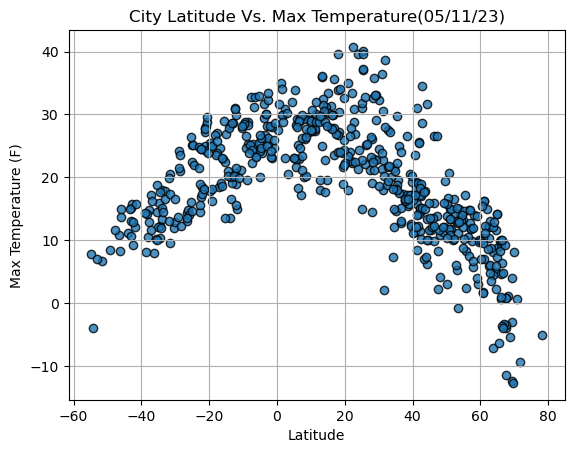

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")
plt.savefig("Latitude vs Temperature (F).png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

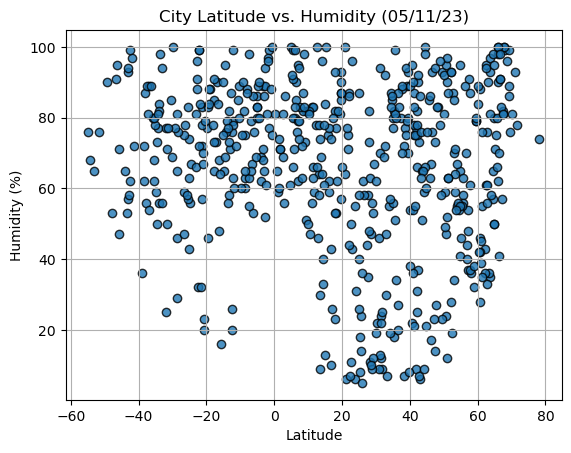

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

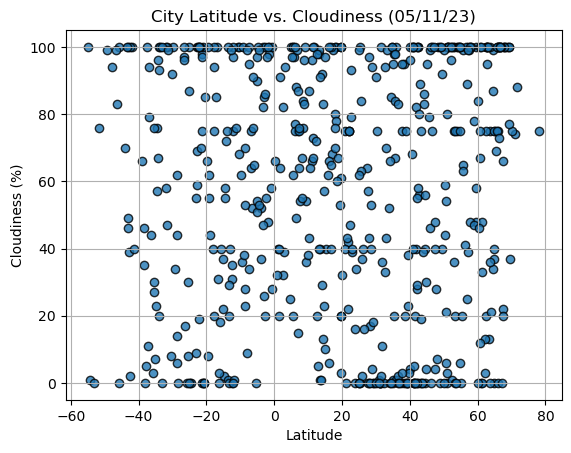

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

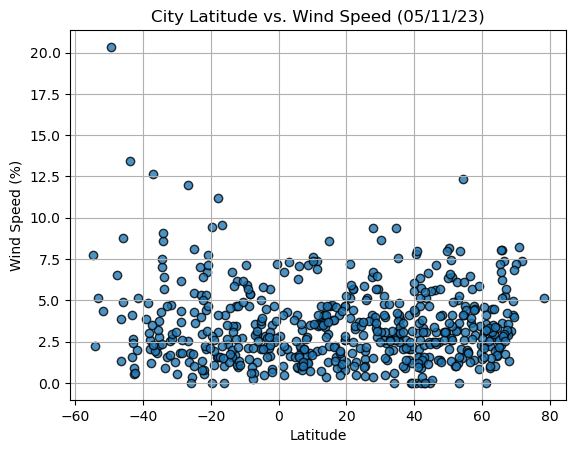

In [ ]:
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots

def plotlinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The t-squared is: {rvalue}")
    regress_value = xdata * str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_value,"r-")
    plt.annotate(line_eq, lblpos,fontsize=14,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show
    
# Define a fuction for annotating



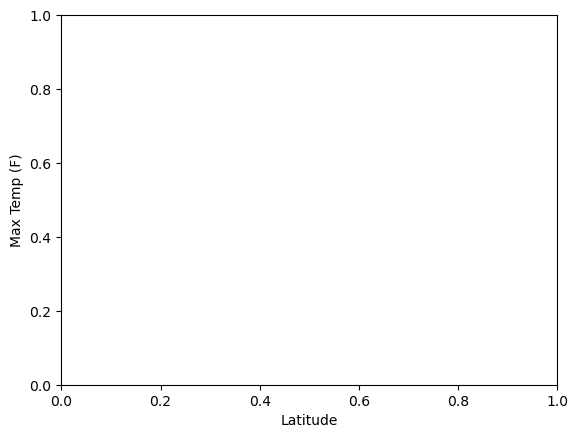

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemisphere = city_data_df[city_data_df["Lat"] >= 0]

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Display sample data
northern_hemisphere.head()

equation = linregress(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

  
plt.show()

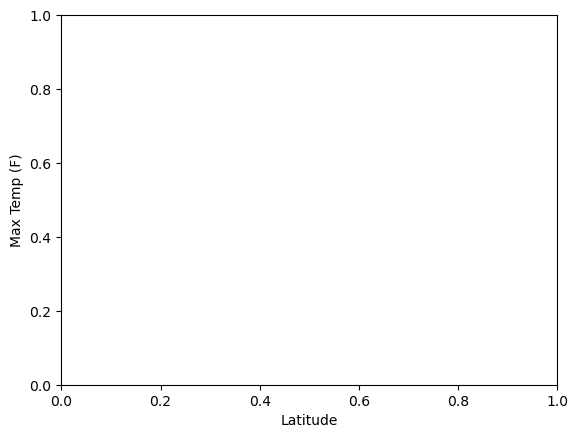

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemisphere = city_data_df[city_data_df["Lat"] >= 0]

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Display sample data
southern_hemisphere.head()

plt.show()


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.42x + 33.88
The r-squared is: -0.8071265587143379
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


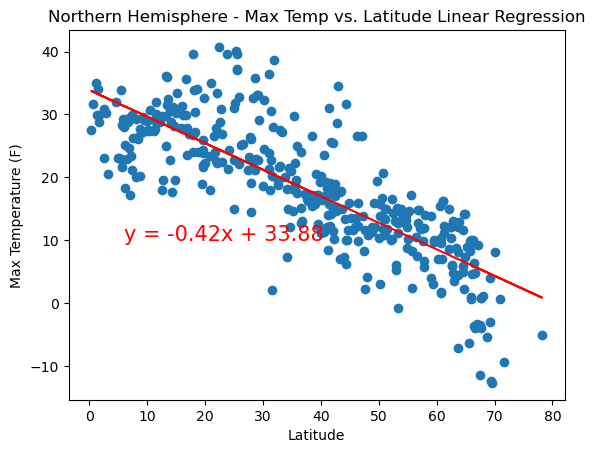

In [ ]:
# Linear regression on Northern Hemisphere


x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()


Regression line equation is: y = -0.42x + 33.88
The r-squared is: -0.8071265587143379
The regression displays a negative correlation.
In the southern hemisphere, as you move away from the equator the temperature decreases.


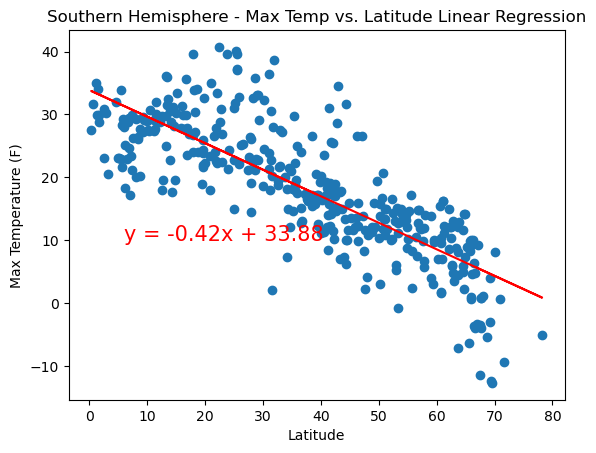

In [ ]:
# Linear regression on Southern Hemisphere

x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the southern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.05x + 61.6
The r-squared is: 0.03662295259410222
The regression displays a negative correlation.
In the southern hemisphere, as you move away from the equator the temperature decreases.


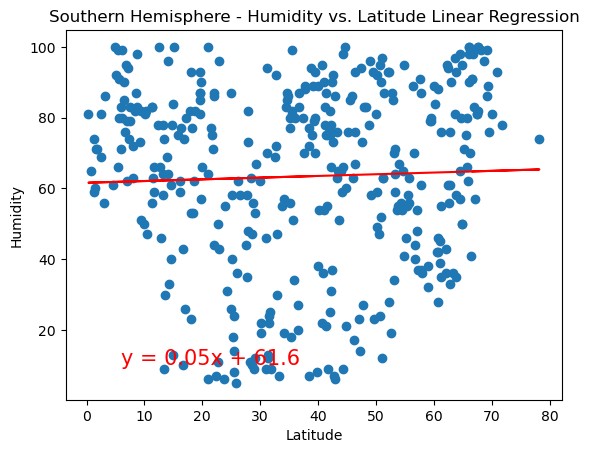

In [ ]:
# Northern Hemisphere

x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the southern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()



Regression line equation is: y = 0.05x + 61.6
The r-squared is: 0.03662295259410222
The regression displays a negative correlation.
In the southern hemisphere, as you move away from the equator the temperature decreases.


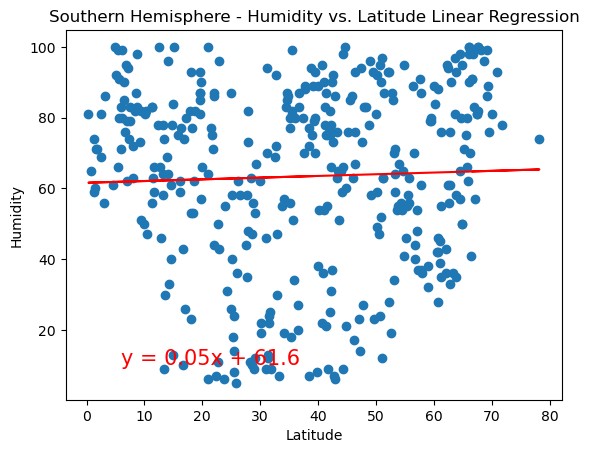

In [ ]:
# Southern Hemisphere

x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the southern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.1x + 52.24
The r-squared is: 0.05370892752614613
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


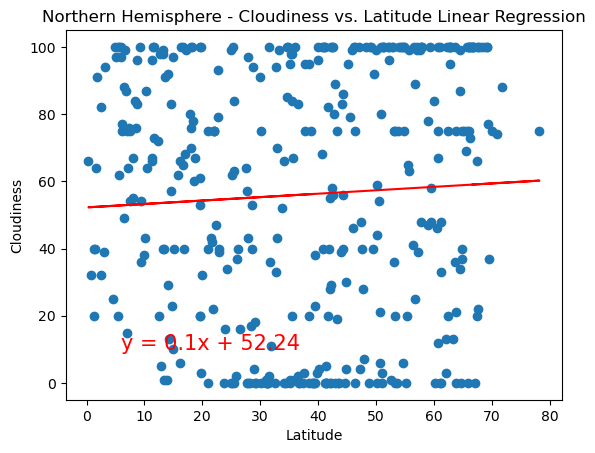

In [ ]:
# Northern Hemisphere

x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

Regression line equation is: y = 0.1x + 52.24
The r-squared is: 0.05370892752614613
The regression displays a negative correlation.
In the southern hemisphere, as you move away from the equator the temperature decreases.


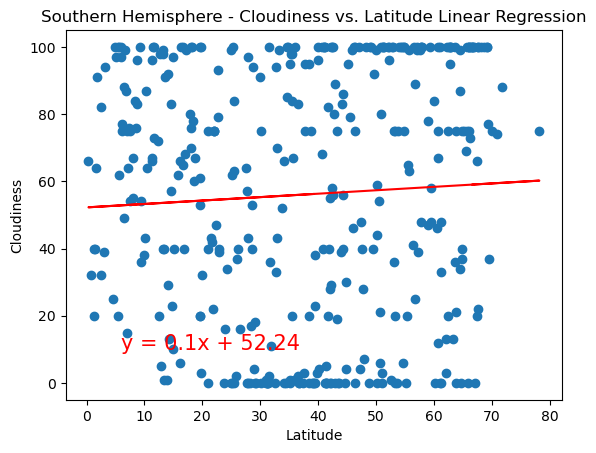

In [ ]:
# Southern Hemisphere

x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the southern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.01x + 2.92
The r-squared is: 0.103408411641595
The regression displays a negative correlation.
In the northern hemisphere, as you move away from the equator the temperature decreases.


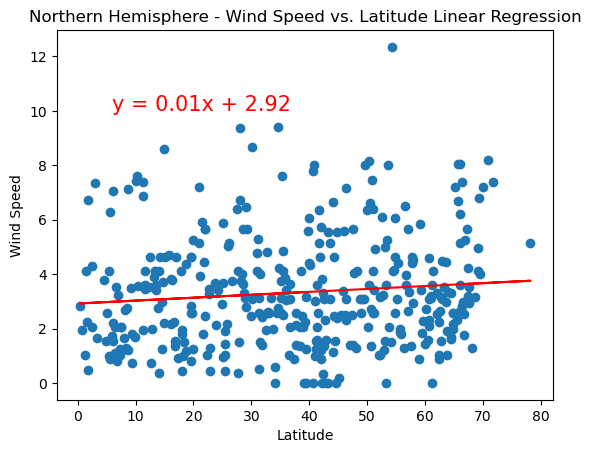

In [ ]:
# Northern Hemisphere

x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the northern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

Regression line equation is: y = 0.01x + 2.92
The r-squared is: 0.103408411641595
The regression displays a negative correlation.
In the southern hemisphere, as you move away from the equator the temperature decreases.


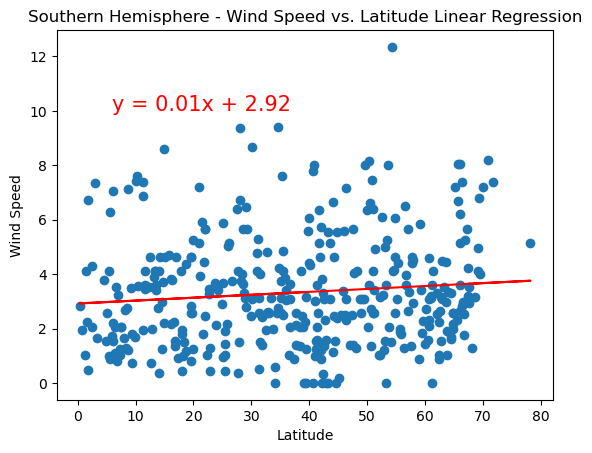

In [ ]:
# Southern Hemisphere

x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the southern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE